# ATP Tennis Data - Raw Player Data (1985 to 2018)


In our previous notebooks, we saw that using raw player data gave us best results. In this notebook, we will use data from 1985 to 2018 to see if more data helps our model predict better.


### Results from previous notebook

```
Model Score: 0.6833220796758946

ROC/AUC Score: 0.6833051847604916
              precision    recall  f1-score   support

        Loss       0.68      0.68      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

Adding data from 1985 to 1998 did not help our models perform better. Most models droped slightly in their accuracy. This suggests that match behavior is changing over time so adding older data does not necessarily help us predict current behavior.

```
Model Score: 0.6678010890454836

ROC/AUC Score: 0.6678015698312835
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976
```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-1985"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe.csv'

START_YEAR = 1985
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6590727098014093

ROC/AUC Score: 0.6590844629270696
              precision    recall  f1-score   support

        Loss       0.66      0.65      0.66     12522
         Win       0.66      0.66      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8199  4323
Win   4192  8262


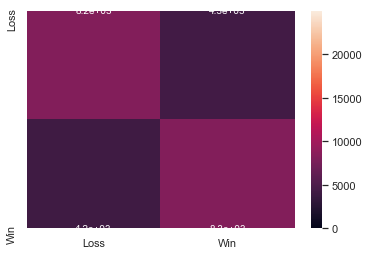

In [4]:
lr.analyze()

In [5]:
# ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6039397821909033

ROC/AUC Score: 0.6039394625632325
              precision    recall  f1-score   support

        Loss       0.61      0.60      0.60     12522
         Win       0.60      0.60      0.60     12454

    accuracy                           0.60     24976
   macro avg       0.60      0.60      0.60     24976
weighted avg       0.60      0.60      0.60     24976

      Loss   Win
Loss  7564  4958
Win   4934  7520


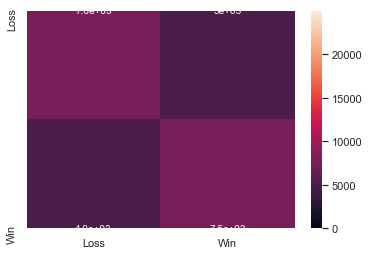

In [8]:
knn.analyze()

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5944506726457399

ROC/AUC Score: 0.5944540980285169
              precision    recall  f1-score   support

        Loss       0.60      0.59      0.59     12522
         Win       0.59      0.60      0.59     12454

    accuracy                           0.59     24976
   macro avg       0.59      0.59      0.59     24976
weighted avg       0.59      0.59      0.59     24976

      Loss   Win
Loss  7428  5094
Win   5035  7419


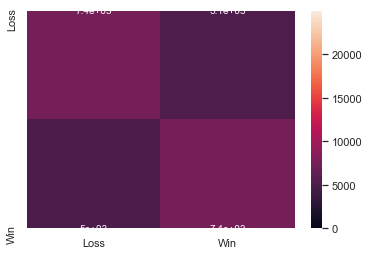

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Model Score: 0.634168802049968

ROC/AUC Score: 0.6339776119611626
              precision    recall  f1-score   support

        Loss       0.62      0.70      0.66     12522
         Win       0.65      0.56      0.61     12454

    accuracy                           0.63     24976
   macro avg       0.64      0.63      0.63     24976
weighted avg       0.64      0.63      0.63     24976

      Loss   Win
Loss  8818  3704
Win   5433  7021


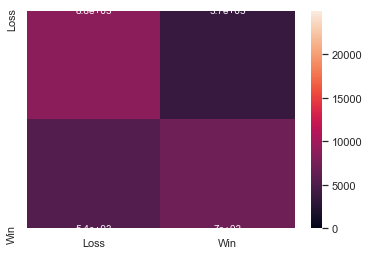

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3669           37.04m
         2           1.3509           45.59m
         3           1.3368           45.68m
         4           1.3251           43.25m
         5           1.3144           40.60m
         6           1.3054           39.39m
         7           1.2982           39.14m
         8           1.2911           38.08m
         9           1.2850           37.00m
        10           1.2797           36.02m
        20           1.2495           29.94m
        30           1.2322           26.04m
        40           1.2218           21.77m
        50           1.2110           17.39m
        60           1.2038           13.40m
        70           1.2000            9.73m


Model Score: 0.6678010890454836

ROC/AUC Score: 0.6678015698312835
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976

      Loss   Win
Loss  8360  4162
Win   4135  8319


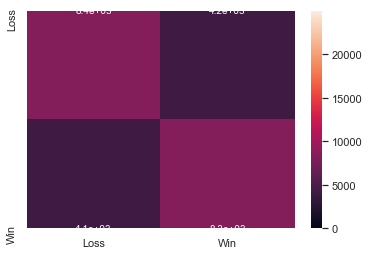

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6567504804612428

ROC/AUC Score: 0.656791867094386
              precision    recall  f1-score   support

        Loss       0.66      0.64      0.65     12522
         Win       0.65      0.67      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8034  4488
Win   4085  8369


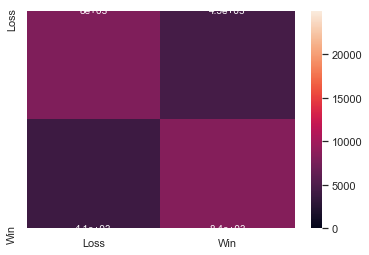

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


# Results

In [41]:
report = pd.read_csv(REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
36,LogisticRegression,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.662998,0.662998,"{""0"": {""0"": 4893, ""1"": 2503}, ""1"": {""0"": 2488,...","{""Loss"": {""precision"": 0.6615738236884803, ""re...",../models/logisticregression-1998-2018-diff-oh...,0.0,0.0,0.0
37,KNeighborsClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.606887,0.606872,"{""0"": {""0"": 4445, ""1"": 2886}, ""1"": {""0"": 2936,...","{""Loss"": {""precision"": 0.6063292865911881, ""re...",../models/kneighborsclassifier-1998-2018-diff-...,0.0,0.0,0.0
38,DecisionTreeClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.586698,0.586698,"{""0"": {""0"": 4329, ""1"": 3069}, ""1"": {""0"": 3052,...","{""Loss"": {""precision"": 0.5851581508515815, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0
39,RandomForestClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.630115,0.630340,"{""0"": {""0"": 5165, ""1"": 3262}, ""1"": {""0"": 2216,...","{""Loss"": {""precision"": 0.6129108816898066, ""re...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0
40,GradientBoostingClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.660297,0.660317,"{""0"": {""0"": 4920, ""1"": 2570}, ""1"": {""0"": 2461,...","{""Loss"": {""precision"": 0.6568758344459279, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,9.0,9.0
41,AdaBoostClassifier,diff-ohe,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.659217,0.659273,"{""0"": {""0"": 4994, ""1"": 2660}, ""1"": {""0"": 2387,...","{""Loss"": {""precision"": 0.6524692970995558, ""re...",../models/adaboostclassifier-1998-2018-diff-oh...,0.0,1.0,1.0


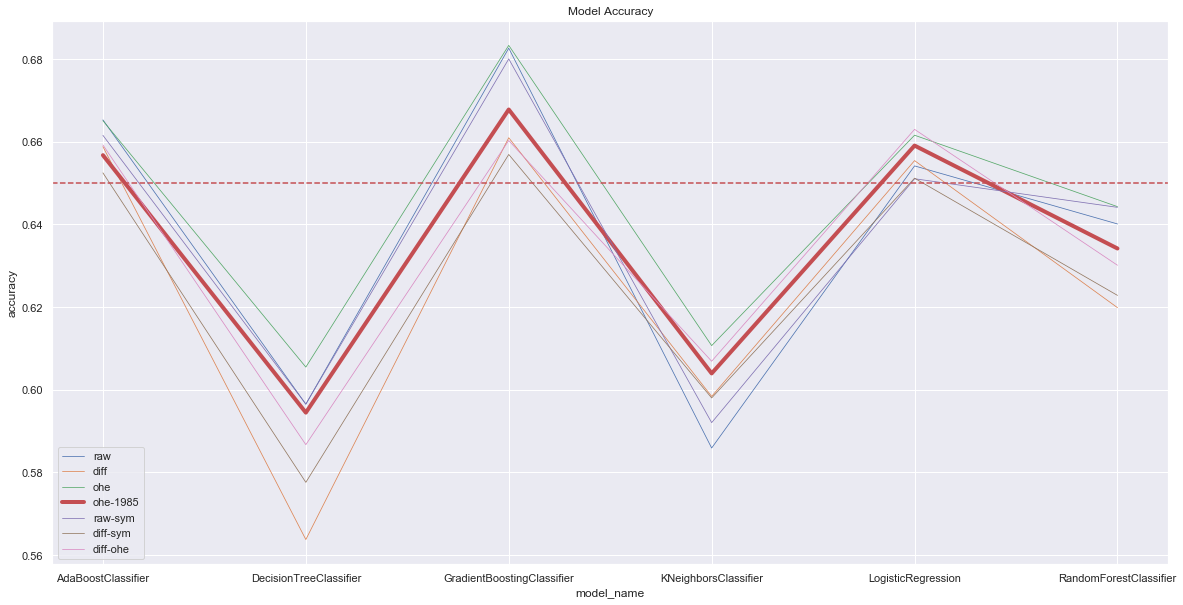

In [42]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


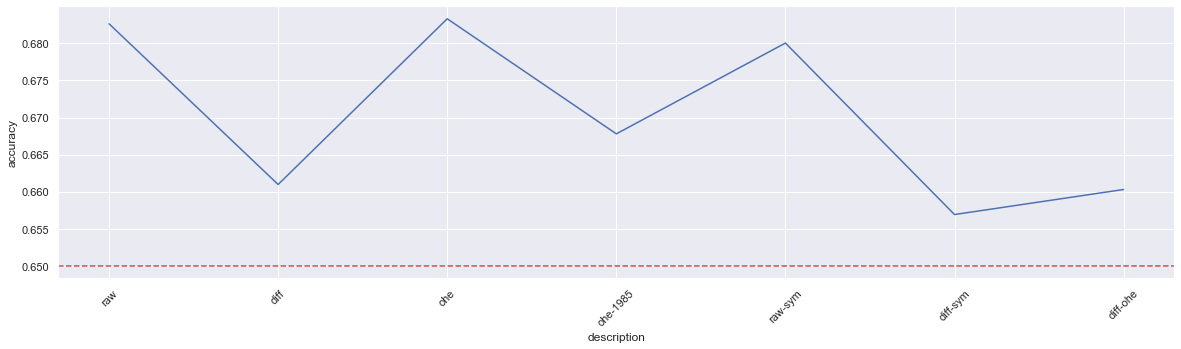

In [43]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [30]:

current_report = report[(report.model_name == best_model) &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [37]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

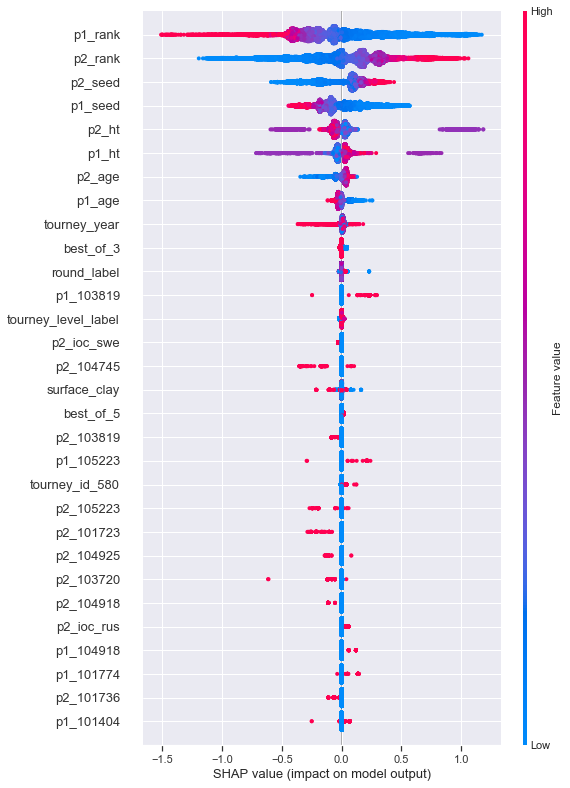

In [38]:
shap.summary_plot(shap_values, X_test, max_display=30)

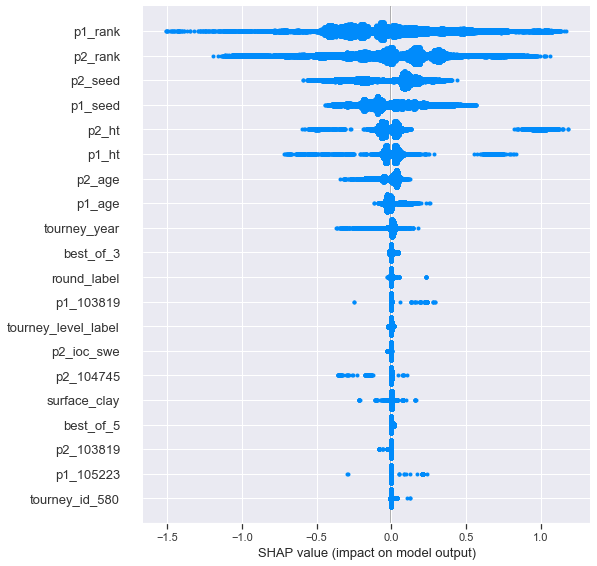

In [39]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [40]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 01:34
